In [24]:
from kiln_ai.datamodel import Project

print("Reading Kiln project")
project = Project.load_from_file("../projects/voicebox/project.kiln")
print("\nTitle:", project.name)
print("Description:", project.description)
print("Created By:", project.created_by)
print("Created At:", project.created_at)

Reading Kiln project

Title: Voicebox
Description: A project using technology to aid people who lack both the ability to speak and fine motor control. This is common with cerebral palsy. Learn more at https://github.com/scosman/voicebox
Created By: scosman
Created At: 2024-10-24 13:14:43.662378


In [25]:
task = next(t for t in project.tasks() if t.id == "666916389666")
print("\nTask:", task.name)
print("ID:", task.id)
print("Description:", task.description)
print("Created By:", task.created_by)
print("Created At:", task.created_at)
print("Location:", task.path)

print("Total dataset size:", len(task.runs()))
print(
    "Rated dataset items:",
    len([run for run in task.runs() if run.output.rating is not None]),
)


Task: Sentence Expansion Structured
ID: 666916389666
Description: Expanding sentence fragments into complete sentences. Given a context, you provide a set of options for sentence completion for the user to choose between.
Created By: scosman
Created At: 2024-10-24 13:38:46.284477
Location: ../projects/voicebox/tasks/666916389666 - Sentence Expansion Structured/task.kiln
Total dataset size: 19
Rated dataset items: 8


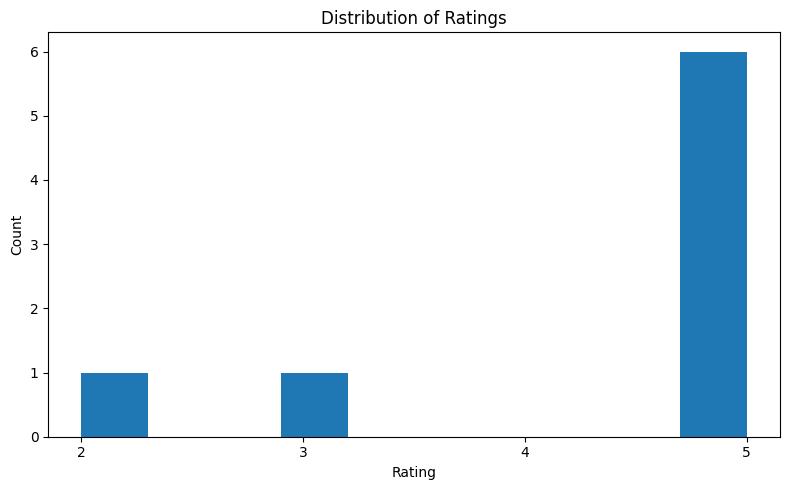

In [26]:
# Some simple analysis, importing into a pandas dataframe

import glob
import json
from pathlib import Path

import pandas as pd

dataitem_glob = str(task.path.parent) + "/runs/*/task_run.kiln"

dfs = []
for file in glob.glob(dataitem_glob):
    js = json.loads(Path(file).read_text())
    df = pd.json_normalize(js)
    dfs.append(df)
final_df = pd.concat(dfs, ignore_index=True)

# Map None ratings to 'no_rating', keep numeric ratings as is
ratings = ["no_rating" if pd.isna(r) else r for r in final_df["output.rating.value"]]
ratings = [r for r in final_df["output.rating.value"] if not pd.isna(r)]

# Create a histogram of ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(ratings)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(
    range(int(min(ratings)), int(max(ratings)) + 1)
)  # Set ticks to whole numbers
plt.tight_layout()
plt.show()